# 02. Neural Network classification with pytorch

Classification is problem of predcition of whether something is one or another



## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples= 1000

#create circles
X,y= make_circles(n_samples,
                  noise= 0.03,
                  random_state=42
                  )

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:{X[:5]}")
print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [ ]:
# makr dateframeof a circle data
import pandas as pd
circles= pd.DataFrame({"X1":X[:,0],
                       "X2":X[:,1],
                      "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


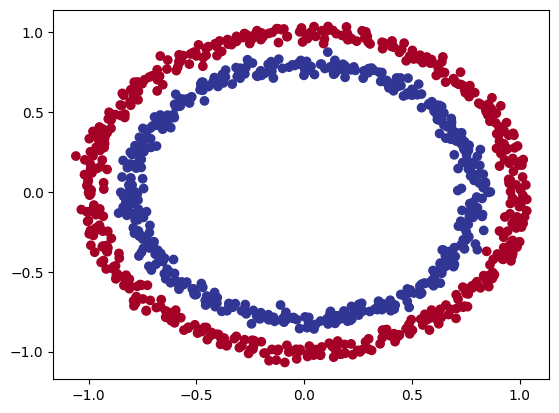

In [ ]:
# visaulize visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we're working is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first example of features and labels
X_sample= X[0]
y_sample= y[0]

print(f"Values of one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values of one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape of one sample of X: (2,) and the same for y: ()


### 1.2 Trun data into tensor and create train and test splits

In [ ]:
# Turn date into tensors
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensor
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=  train_test_split(X,
                                                    y,
                                                    test_size=0.2,  #20% data will be test
                                                    random_state=42)


In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test),

(800, 200, 800, 200)

## 2. Building a model

Lets's build a model to classify out blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model(by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
# Import Pytorch and nn
import torch
from torch import nn

#make device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we're setup device agnositic code and now lets create a model

1. Subclasss `nn.Module` (almost  all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
y_train.shape

torch.Size([800])

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self ):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1= nn.Linear(in_features=2, out_features=5)#takes in 2 features and upscale to 5 features
    self.layer_2= nn.Linear(in_features=5, out_features=1)#takes in 5 features and output to single feature(as output y)

    '''this is  another technique'''
    # self.two_Linear_layers=nn.Sequential(
    # nn.Linear(in_features=2, out_features=5),
    # nn.Linear(in_features=5, out_features=1)
    # )

  # 3. Defina a forward() method that outlines thr forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x-> layer_1 -> layer_2 ->
    # return self.two_Linear_layers(x)

# 4. Instantiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

In [ ]:
# Lets replicate the model above using nn.Sequential()
model_0= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [ ]:
# make prediction
with torch.inference_mode():
  untrained_preds= model_0(X_test.to(device))
print(f"Length of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples:{len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: {untrained_preds[:10]}")
print(f"First 10 test samples: {y_test[:10]}")

Length of prediction: 200, Shape: torch.Size([200, 1])
Lenght of test samples:200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
First 10 test samples: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should be used?

for example for regression we might want a MAR or MSE(Mean absolute/square error)

For classification we might want binary cross entropy loss

And for optimizers, 2 of the most common and useful are SGD and Adam

* For the loss function we're goind to use `torch.nn.BCEwithLogitsLoss()`
* For different optimizers see *torch.optim*

In [ ]:
# setup the loss function
# loss_fn= nn.BCELoss()
loss_fn= nn.BCEWithLogitsLoss( ) #it include sigmoid activation function built in in it
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr= 0.1)


In [ ]:
# Caculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

## 3. Train model

To train the model, we are going to need to build a training loop

1. Forward pass
2. Calculate loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer step (gradient decent )

### 3.1 Going from raw logits -> prediction -> prediction labels

Our model outputs are going to be a raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function(e.g sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits= model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use sigmoid activatin function on our model logic to turn into prediction probabilities
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values, we need to perform a range-style rounding on them:
* y_pred_probs>=0.5, y=1
* y_pred_probs<0.5, y=0

In [ ]:
y_preds= torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [ ]:
# find predicted labels
y_preds= torch.round(y_pred_probs)

# In full (logits ->pred probs -> pred labels)
y_pred_labels= torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of eextra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a training and testing loop

In [1]:
torch.manual_seed(42)
epochs= 1000

#put the data to target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits= model_0(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  # 2. Loss and accuracy
  loss= loss_fn(y_logits, y_train)  #nn.BCEWithLogitsLoss expects raw logits as input
  acc= accuracy_fn(y_true=y_train, y_pred= y_pred)

  # 3. Optimizer zero grad()
  optimizer.zero_grad()

  # 4. Loss backward(Backpropagation)
  loss.backward()

  # 5. optimizer step(gradient decent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits= model_0(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss and accuracy
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out whats happening
    if epoch %10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:5f}%, Test acc: {test_acc:2f}%")



NameError: name 'torch' is not defined

## 4. Make predictions and evaluate the model

from the metrics it looks like our model is not learning anything

so lets make some prediction

To do so we import the function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper function from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

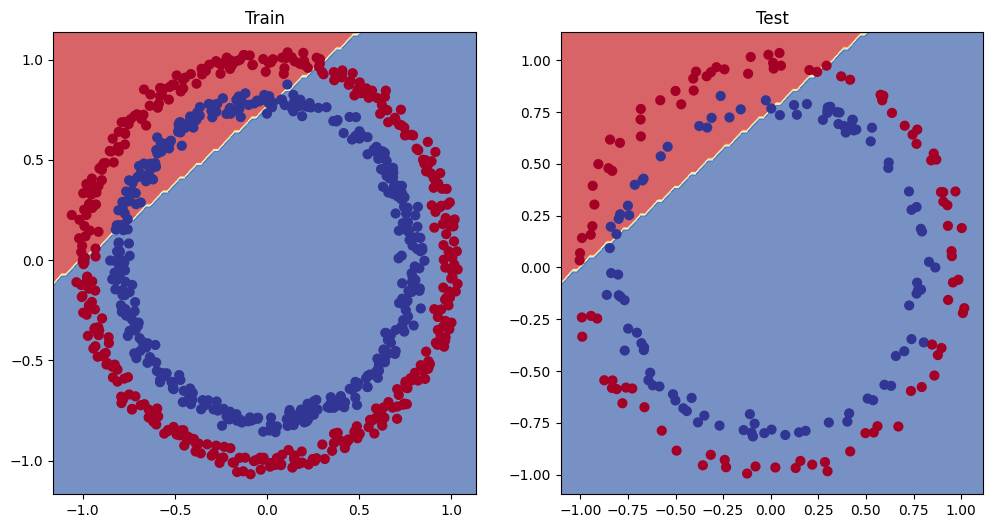

In [ ]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. improving a model

* Add more layers- give the model more chances to learn about patterns in the data
* Add more hidden units- go from 5 hidden unts to 10
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function
* Change the optimizer

These options are all from a models perspective beacuse they deal directly with the model, rather than the data.

They are called as hyperparameters


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    # z= self.layer_1(x)
    # z= self.layer_2(z)
    # z=self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1= CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn= nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer= torch.optim.SGD(params= model_1.parameters(),
                           lr= 0.1)


In [ ]:
torch.manual_seed(42)
epochs= 1000

# Put data on target device
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## Training
  model_1.train()

  # 1. Forward pass
  y_logits= model_1(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the accuracy and loss
  loss= loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true= y_train,
                   y_pred= y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits= model_1(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))
    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true=y_test, y_pred= test_pred)

    # Print out whats happening
    if epoch % 10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:5f}%, Test acc: {test_acc:2f}%")

Epoch: 0 | Loss: 0.69396 | Test Loss: 0.692615%, Test acc: 51.000000%
Epoch: 10 | Loss: 0.69369 | Test Loss: 0.692704%, Test acc: 50.000000%
Epoch: 20 | Loss: 0.69351 | Test Loss: 0.692830%, Test acc: 49.500000%
Epoch: 30 | Loss: 0.69339 | Test Loss: 0.692966%, Test acc: 48.000000%
Epoch: 40 | Loss: 0.69329 | Test Loss: 0.693103%, Test acc: 49.000000%
Epoch: 50 | Loss: 0.69322 | Test Loss: 0.693236%, Test acc: 50.000000%
Epoch: 60 | Loss: 0.69317 | Test Loss: 0.693362%, Test acc: 51.500000%
Epoch: 70 | Loss: 0.69312 | Test Loss: 0.693481%, Test acc: 50.500000%
Epoch: 80 | Loss: 0.69309 | Test Loss: 0.693593%, Test acc: 50.000000%
Epoch: 90 | Loss: 0.69307 | Test Loss: 0.693696%, Test acc: 48.500000%
Epoch: 100 | Loss: 0.69305 | Test Loss: 0.693790%, Test acc: 48.000000%
Epoch: 110 | Loss: 0.69303 | Test Loss: 0.693877%, Test acc: 46.500000%
Epoch: 120 | Loss: 0.69302 | Test Loss: 0.693956%, Test acc: 46.500000%
Epoch: 130 | Loss: 0.69301 | Test Loss: 0.694029%, Test acc: 46.000000%
Epo

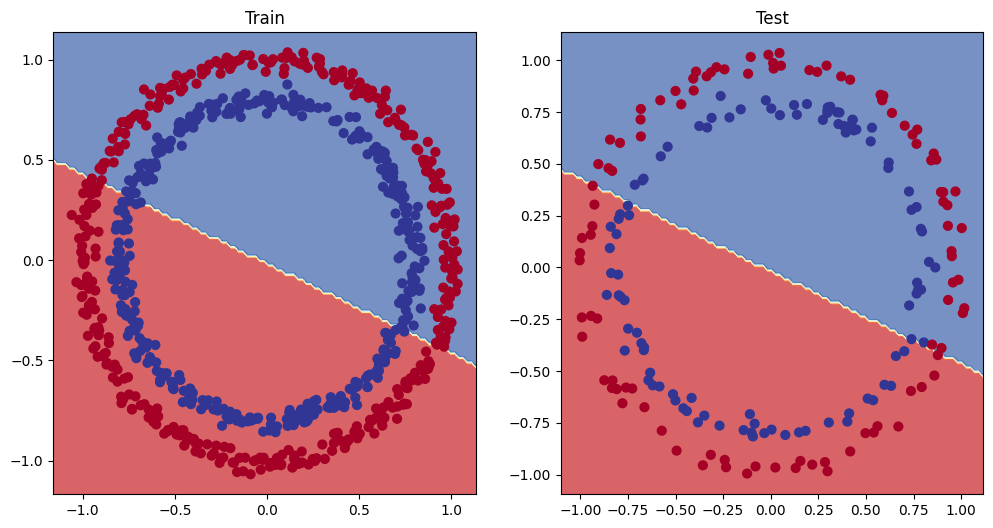

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
# Create some data same as notebook 1
weight=0.7
bias= 0.3
start=0
end=1
step=0.01

# Create data
X_regression= torch.arange(start, end, step).unsqueeze(dim=1)
y_regression= weight*X_regression+bias

# Check the data
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
# Create train and test split
train_split= int(0.8*len(X_regression))
X_train_regression, y_train_regression= X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression= X_regression[train_split:], y_regression[train_split:]

In [ ]:
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

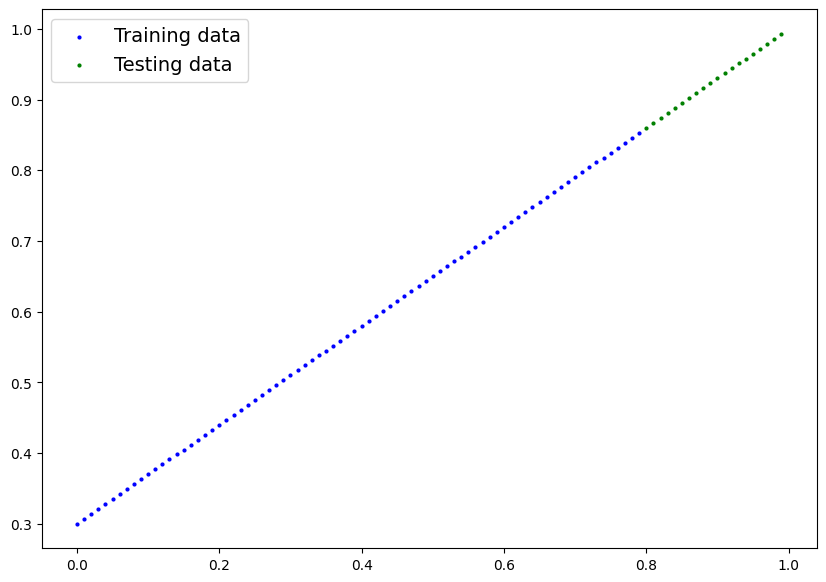

In [ ]:
plot_predictions(train_data=X_train_regression,
               train_labels=y_train_regression,
               test_data=X_test_regression,
               test_labels=y_test_regression,
               predictions=None)

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.3 Adjusting `model_1` to fit a straight line


In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn= nn.L1Loss()
optimizer= torch.optim.SGD(params= model_2.parameters(),
                           lr= 0.01)

In [ ]:
#train the model
torch.manual_seed(42)
epochs= 1000

# Put data on target device
X_train_regression, y_train_regression= X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression= X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred= model_2(X_train_regression)
  loss= loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred= model_2(X_test_regression)
    test_loss= loss_fn(test_pred, y_test_regression)

  #print out what hapening
  if epoch %10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:5f}")



Epoch: 0 | Loss: 0.75986 | Test Loss: 0.911029
Epoch: 10 | Loss: 0.40240 | Test Loss: 0.504739
Epoch: 20 | Loss: 0.06007 | Test Loss: 0.101508
Epoch: 30 | Loss: 0.01559 | Test Loss: 0.032307
Epoch: 40 | Loss: 0.03092 | Test Loss: 0.001107
Epoch: 50 | Loss: 0.03196 | Test Loss: 0.001076
Epoch: 60 | Loss: 0.03192 | Test Loss: 0.001702
Epoch: 70 | Loss: 0.03081 | Test Loss: 0.000966
Epoch: 80 | Loss: 0.03077 | Test Loss: 0.001498
Epoch: 90 | Loss: 0.02967 | Test Loss: 0.000923
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.000813
Epoch: 110 | Loss: 0.02962 | Test Loss: 0.001971
Epoch: 120 | Loss: 0.02748 | Test Loss: 0.000910
Epoch: 130 | Loss: 0.02852 | Test Loss: 0.001806
Epoch: 140 | Loss: 0.02850 | Test Loss: 0.002456
Epoch: 150 | Loss: 0.02744 | Test Loss: 0.001693
Epoch: 160 | Loss: 0.02638 | Test Loss: 0.001230
Epoch: 170 | Loss: 0.02637 | Test Loss: 0.001624
Epoch: 180 | Loss: 0.02532 | Test Loss: 0.001247
Epoch: 190 | Loss: 0.02636 | Test Loss: 0.002839
Epoch: 200 | Loss: 0.02533 | Te

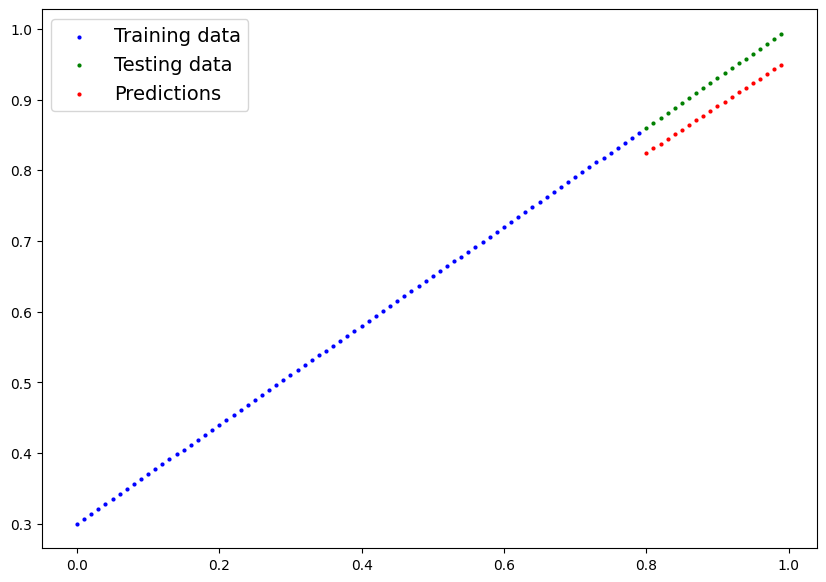

In [ ]:
# Trun on evaluation
model_2.eval()
with torch.inference_mode():
  y_preds= model_2(X_test_regression)

#plot data and prediction
plot_predictions(train_data=X_train_regression,
               train_labels=y_train_regression,
               test_data=X_test_regression,
               test_labels=y_test_regression,
               predictions=y_preds)

## 6. The missing piece : non-linearity

"What pattern could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non linear function>

### 6.1 REcreating non linear data



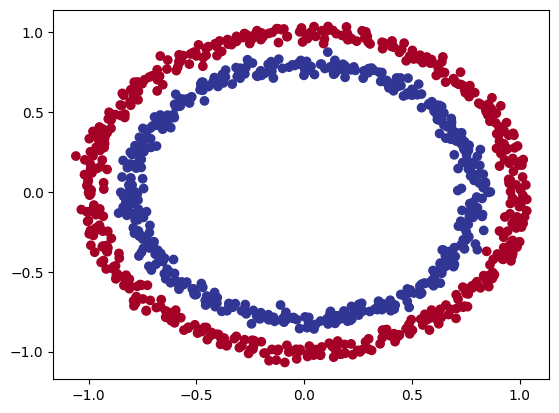

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
# Buliding a model with non-linearity
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1= nn.Linear(in_features=2, out_features=10)
    self.layer_2= nn.Linear(in_features=10, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1)
    self.relu= nn.ReLU()

  def forward(self, x):
    z= self.layer_1(x)
    z= self.relu(z)
    z= self.layer_2(z)
    z= self.relu(z)
    z= self.layer_3(z)
    return z
    # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3= CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params= model_3.parameters(),
                           lr= 0.1)

### 6.3 Training a model with non linearity


In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=2000

#put all data on target data
X_train, y_train= X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

#Loop through data
for epoch in range(epochs):
  ### training
  model_3.train()

  # 1. Forward pass
  y_logits= model_3(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  loss= loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward(backpropagation)
  loss.backward()

  # 5. step the optimizer
  optimizer.step()

  ### testing
  model_3.eval()
  with torch.inference_mode():
    #1. forward pass
    test_logits= model_3(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_true= y_test, y_pred= test_pred)

    if epoch %10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:5f}%, Test acc: {test_acc:2f}%")


Epoch: 0 | Loss: 0.69295 | Test Loss: 0.693188%, Test acc: 50.000000%
Epoch: 10 | Loss: 0.69248 | Test Loss: 0.692596%, Test acc: 50.000000%
Epoch: 20 | Loss: 0.69225 | Test Loss: 0.692311%, Test acc: 56.500000%
Epoch: 30 | Loss: 0.69209 | Test Loss: 0.692123%, Test acc: 68.000000%
Epoch: 40 | Loss: 0.69195 | Test Loss: 0.691948%, Test acc: 71.000000%
Epoch: 50 | Loss: 0.69181 | Test Loss: 0.691773%, Test acc: 58.000000%
Epoch: 60 | Loss: 0.69168 | Test Loss: 0.691612%, Test acc: 54.500000%
Epoch: 70 | Loss: 0.69155 | Test Loss: 0.691464%, Test acc: 53.000000%
Epoch: 80 | Loss: 0.69141 | Test Loss: 0.691315%, Test acc: 53.000000%
Epoch: 90 | Loss: 0.69128 | Test Loss: 0.691169%, Test acc: 53.000000%
Epoch: 100 | Loss: 0.69115 | Test Loss: 0.691024%, Test acc: 52.500000%
Epoch: 110 | Loss: 0.69103 | Test Loss: 0.690881%, Test acc: 53.500000%
Epoch: 120 | Loss: 0.69090 | Test Loss: 0.690736%, Test acc: 54.000000%
Epoch: 130 | Loss: 0.69077 | Test Loss: 0.690583%, Test acc: 54.500000%
Epo

In [ ]:
# Make prediciton
model_3.eval()
with torch.inference_mode():
  y_preds= torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

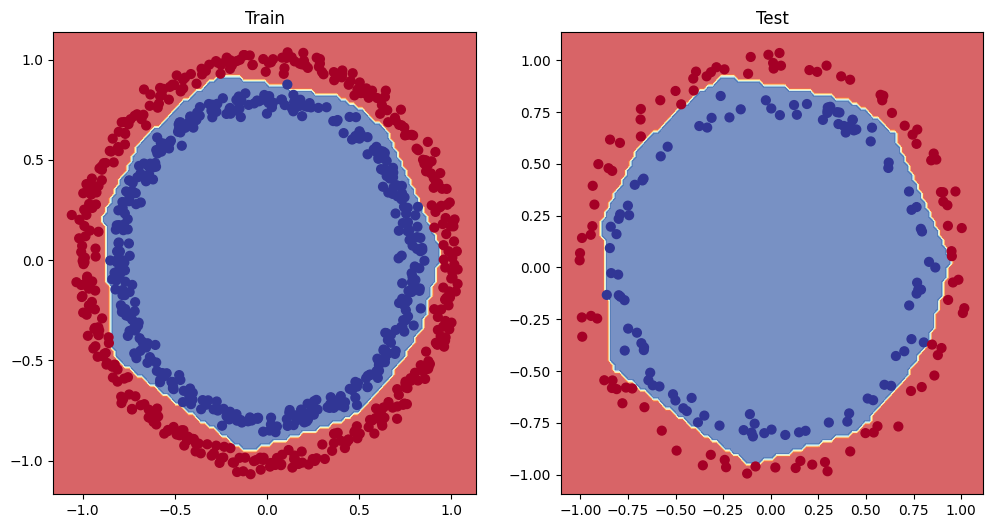

In [ ]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in dta and it tries to figure out the patterns on its own

Anf these tools are linear and non-linear functions

In [ ]:
# Create a tensor
A= torch.arange(-10,10,1, dtype= torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

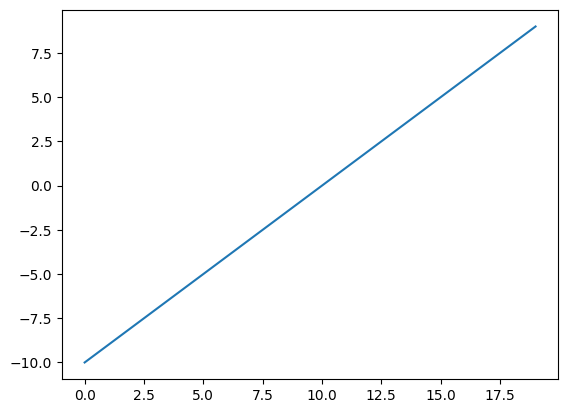

In [ ]:
plt.plot(A)

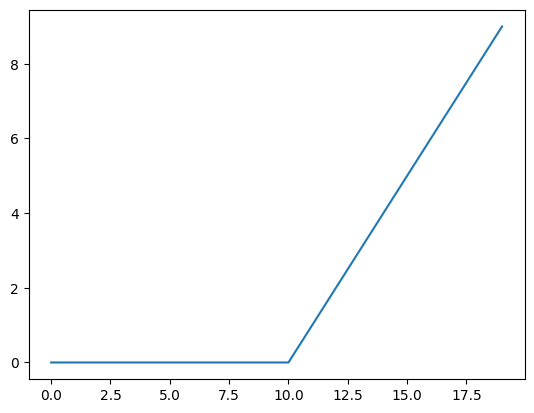

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)  #INPUT must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

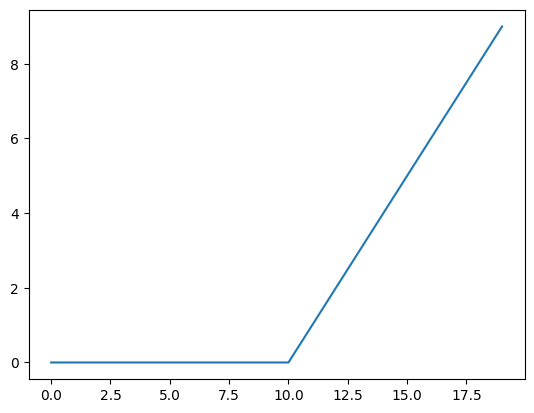

In [ ]:
plt.plot(relu(A))

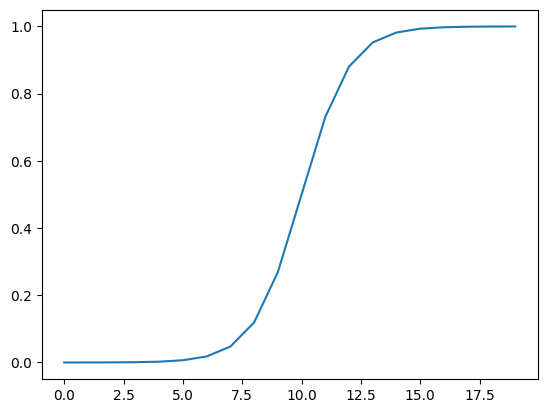

In [ ]:
plt.plot(torch.sigmoid(A))

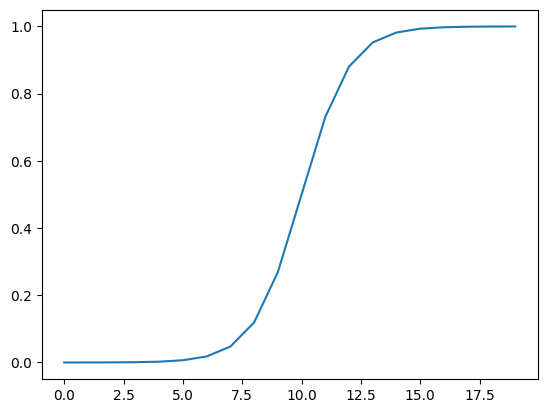

In [ ]:
def sigmoid(x):
  return 1/(torch.exp(-x)+1)
plt.plot(sigmoid(A))

 ## 8. Putting it all together with a multi-class classification problem

* Binary classification: one thing or another
* Multiclass classification: more than one thing or another

### 8.1 Creating a tory multi-class dataset


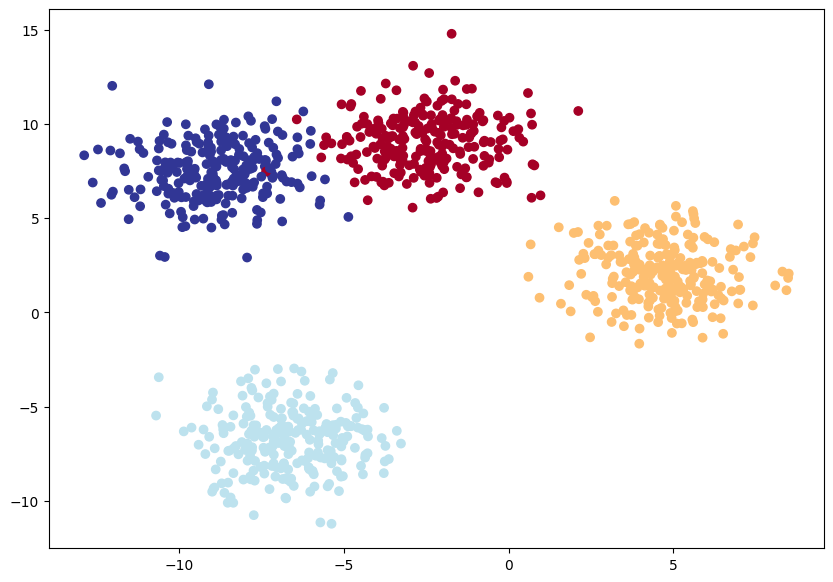

In [ ]:
# import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#Set the hyperparameter for data creations

NUM_CLASSES= 4
NUM_FEATURES= 2
RANDOM_SEED= 42

# 1. Create multiclass data
X_blob, y_blob= make_blobs(n_samples=1000,
                           n_features= NUM_FEATURES,
                           centers= NUM_CLASSES,
                           cluster_std= 1.5, #give the cluster a little shake up
                           random_state= RANDOM_SEED)

# 2 Turn data into tensors
X_blob= torch.from_numpy(X_blob).type(torch.float)
y_blob= torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test= train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state= RANDOM_SEED)


# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Buliding a multiclass classification model in pytorch

In [ ]:
# Create a device agnostic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Bulid a multiclass classification model
class BlobModelV1(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    ''' Initialize multi-class classification model'''
    super().__init__()
    self.linear_layer_stack= nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# create an instance of blobMOdle and sent it to the target devices
model_4= BlobModelV1(input_features=2, output_features=4).to(device)
model_4

BlobModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### 8.3 Create a loss function and optimizer

In [ ]:
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_4.parameters(),
                           lr=0.1)


###8.4 getting prediction probaiblities for a multiclass pytorch model

Logits(raw output of the model) -> Pred probs(use `torch.softmax`) -> pred lables(takes tha argmax of the prediction probabilities)


In [ ]:
# lets get some raw output of our model
model_4.eval()
with torch.inference_mode():
  y_logits= model_4(X_blob_test)

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Connvert our modle's logit output to prediction probabilities

y_pred_prob= torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_prob[:5])



tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [ ]:
# Convert our models prediction probabilities to prediction labels
y_preds= torch.argmax(y_pred_prob, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training loop and testing loop for a multiclass pytorch model

In [ ]:
# Fit the multiclass model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100
#Put data to target device
X_blob_train, y_blob_train= X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test= X_blob_test.to(device), y_blob_test.to(device)

#Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  # 1. Forward pass
  y_logits= model_4(X_blob_train)
  y_pred= torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss= loss_fn(y_logits, y_blob_train)
  acc= accuracy_fn(y_true= y_blob_train, y_pred= y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ##Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits= model_4(X_blob_test)
    test_pred= torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss= loss_fn(test_logits, y_blob_test)
    test_acc= accuracy_fn(y_true= y_blob_test, y_pred= test_pred)
    if epoch%10==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:5f}%, Test acc: {test_acc:2f}%")

Epoch: 0 | Loss: 1.15883 | Test Loss: 1.075542%, Test acc: 48.000000%
Epoch: 10 | Loss: 0.64476 | Test Loss: 0.660687%, Test acc: 97.500000%
Epoch: 20 | Loss: 0.42535 | Test Loss: 0.430741%, Test acc: 100.000000%
Epoch: 30 | Loss: 0.25294 | Test Loss: 0.245076%, Test acc: 99.500000%
Epoch: 40 | Loss: 0.11232 | Test Loss: 0.102285%, Test acc: 99.500000%
Epoch: 50 | Loss: 0.06627 | Test Loss: 0.058475%, Test acc: 99.500000%
Epoch: 60 | Loss: 0.05068 | Test Loss: 0.042932%, Test acc: 99.500000%
Epoch: 70 | Loss: 0.04300 | Test Loss: 0.034910%, Test acc: 99.500000%
Epoch: 80 | Loss: 0.03836 | Test Loss: 0.029878%, Test acc: 99.500000%
Epoch: 90 | Loss: 0.03525 | Test Loss: 0.026627%, Test acc: 99.500000%


### 8.6 Making and  evaluaion predictions with apytorch multiclass model

In [ ]:
# make prediction
model_4.eval()
with torch.inference_mode():
  y_logits= model_4(X_blob_test)

# view the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
# go from logits -> prediction probabilities
y_pred_prob= torch.softmax(y_logits, dim=1)
y_pred_prob[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
#GO from pred probs to pred labels
y_preds= torch.argmax(y_pred_prob, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

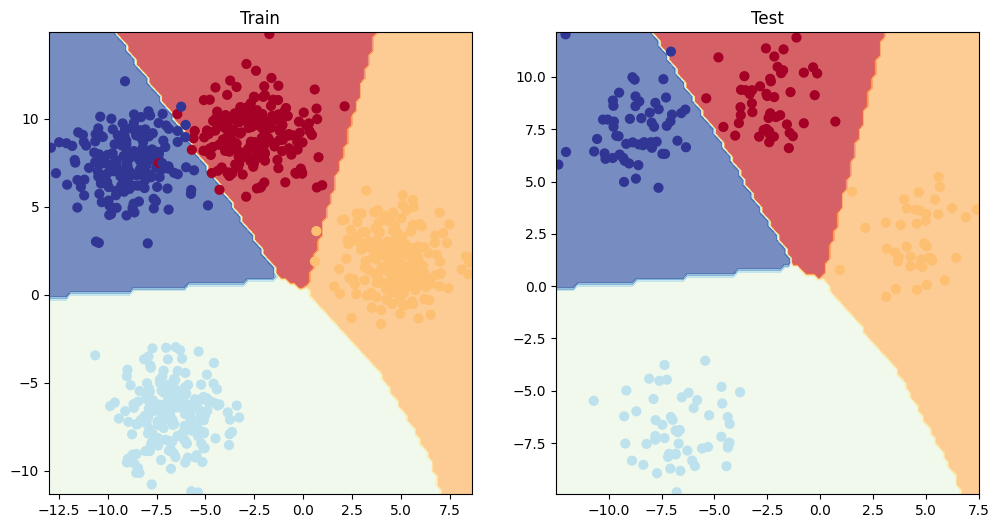

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 10.7 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

#setup metric
torchmetric_accuracy= Accuracy(task="multiclass", num_classes=4)

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)